In [7]:
import sys, os
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))  # notebook lives in notebooks/
venv_path = os.path.join(repo_root, ".venv")

print("Notebook cwd:", os.getcwd())
print("Repo root (checked):", repo_root)
print(".venv path checked:", venv_path)
print(".venv exists:", os.path.isdir(venv_path))
if os.path.isdir(venv_path):
    print("venv python:", os.path.join(venv_path, "bin/python"))
    print("venv pip exists:", os.path.exists(os.path.join(venv_path, "bin/pip")))

Notebook cwd: /workspaces/PyVRP-/notebooks
Repo root (checked): /workspaces/PyVRP-
.venv path checked: /workspaces/PyVRP-/.venv
.venv exists: True
venv python: /workspaces/PyVRP-/.venv/bin/python
venv pip exists: True


In [8]:
%%bash
set -e
REPO_ROOT="$(cd .. && pwd)"
VENV="$REPO_ROOT/.venv"
if [ -x "$VENV/bin/pip" ]; then
  echo "venv pip found: $VENV/bin/pip"
  "$VENV/bin/pip" --version || true
  echo "pip show pyvrp (venv):"
  "$VENV/bin/pip" show pyvrp || true
else
  echo "No .venv pip found at $VENV. Create venv or run notebook from repo root."
fi

venv pip found: /workspaces/PyVRP-/.venv/bin/pip
pip 25.3 from /workspaces/PyVRP-/.venv/lib/python3.12/site-packages/pip (python 3.12)
pip 25.3 from /workspaces/PyVRP-/.venv/lib/python3.12/site-packages/pip (python 3.12)
pip show pyvrp (venv):
pip show pyvrp (venv):
Name: pyvrp
Version: 0.13.0a0
Summary: A state-of-the-art vehicle routing problem solver.
Home-page: https://pyvrp.org/
Author: Niels Wouda
Author-email: nielswouda@gmail.com
License-Expression: MIT
Location: /workspaces/PyVRP-/.venv/lib/python3.12/site-packages
Editable project location: /workspaces/PyVRP-
Requires: matplotlib, numpy, tqdm, vrplib
Required-by: 
Name: pyvrp
Version: 0.13.0a0
Summary: A state-of-the-art vehicle routing problem solver.
Home-page: https://pyvrp.org/
Author: Niels Wouda
Author-email: nielswouda@gmail.com
License-Expression: MIT
Location: /workspaces/PyVRP-/.venv/lib/python3.12/site-packages
Editable project location: /workspaces/PyVRP-
Requires: matplotlib, numpy, tqdm, vrplib
Required-by: 


In [9]:
%%bash
set -e
REPO_ROOT="$(cd .. && pwd)"
VENV="$REPO_ROOT/.venv"
if [ -x "$VENV/bin/pip" ]; then
  echo "Installing/upgrading build tools and editable install into $VENV..."
  "$VENV/bin/pip" install -U pip setuptools wheel meson ninja poetry-core || { echo "pip install failed"; exit 1; }
  (cd "$REPO_ROOT" && "$VENV/bin/pip" install -e .) || { echo "editable install failed"; exit 1; }
  echo "Install complete."
else
  echo "No .venv pip found at $VENV. Create one with: python3 -m venv $VENV"
fi

Installing/upgrading build tools and editable install into /workspaces/PyVRP-/.venv...
Obtaining file:///workspaces/PyVRP-
  Installing build dependencies: started
Obtaining file:///workspaces/PyVRP-
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
 

In [10]:
%%bash
set -eo pipefail
REPO_ROOT="$(cd .. && pwd)"
VENV="$REPO_ROOT/.venv"
if [ -x "$VENV/bin/python" ]; then
  echo "Import check:"
  "$VENV/bin/python" - <<'PY'
try:
    import pyvrp
    print('pyvrp import ok, file=', pyvrp.__file__)
except Exception as e:
    print('pyvrp import failed:', e)
PY
  echo "Running /tmp/run_break_test.py (this may take a while)..."
  mkdir -p notebooks || true
  "$VENV/bin/python" /tmp/run_break_test.py 2>&1 | tee notebooks/run_break_test_output.txt || true
  echo "Script finished. Output saved to notebooks/run_break_test_output.txt"
else
  echo "No .venv python available at $VENV. Create/activate the venv and re-run the notebook."
fi

Import check:
pyvrp import ok, file= /workspaces/PyVRP-/pyvrp/__init__.py
pyvrp import ok, file= /workspaces/PyVRP-/pyvrp/__init__.py
Running /tmp/run_break_test.py (this may take a while)...
Running /tmp/run_break_test.py (this may take a while)...
/workspaces/PyVRP-/.venv/bin/python: can't open file '/tmp/run_break_test.py': [Errno 2] No such file or directory
Script finished. Output saved to notebooks/run_break_test_output.txt
/workspaces/PyVRP-/.venv/bin/python: can't open file '/tmp/run_break_test.py': [Errno 2] No such file or directory
Script finished. Output saved to notebooks/run_break_test_output.txt


In [11]:
%%bash
set -e
REPO_ROOT="$(cd .. && pwd)"
VENV="$REPO_ROOT/.venv"
if [ -x "$VENV/bin/python" ]; then
  echo "Running pytest on tests/test_breaks.py (if present)..."
  "$VENV/bin/python" -m pytest -q tests/test_breaks.py || true
else
  echo "No .venv python available at $VENV."
fi

Running pytest on tests/test_breaks.py (if present)...


ERROR: usage: __main__.py [options] [file_or_dir] [file_or_dir] [...]
__main__.py: error: unrecognized arguments: --cov --cov-report=xml --cov-report=term-missing --numprocesses=auto
  inifile: /workspaces/PyVRP-/pyproject.toml
  rootdir: /workspaces/PyVRP-

ognized arguments: --cov --cov-report=xml --cov-report=term-missing --numprocesses=auto
  inifile: /workspaces/PyVRP-/pyproject.toml
  rootdir: /workspaces/PyVRP-



### After running
- If the run produced errors, open `notebooks/run_break_test_output.txt`, copy and paste the relevant sections back into the chat.
- If pytest shows failing tests, paste failing test names and tracebacks.

I'll interpret the outputs and suggest fixes.

In [12]:
# Parametric function to run the break-node experiment
import os
import matplotlib.pyplot as plt
from pyvrp import read, solve
from pyvrp.stop import MaxRuntime
from pyvrp.utils.break_nodes import add_one_break_per_vehicle
from pyvrp.utils.repair_breaks import (
    repair_one_break_per_route,
    remove_break_only_routes,
)

def run_break_experiment(
    instance_path,
    break_service,
    break_tw=(11 * 60, 14 * 60),
    num_customers=None,
    num_vehicles=None,
    solve_time=5.0,
    new_fixed=0,
    round_func='dimacs',
    plot=True,
    out_dir=None,
    seed=42,
):
    """
    Run a single break-node experiment and return results.

    Parameters:
    - instance_path: path to .vrp instance file
    - break_service: int, service duration of break in minutes (same units as instance)
    - break_tw: tuple(start_minute, end_minute) time-window for break
    - num_customers: if provided, keep only the first `num_customers` clients (depots kept)
    - num_vehicles: if provided, limit total available vehicles to this number
    - solve_time: float seconds to run solver
    - new_fixed: int fixed vehicle cost to set for all vehicle types
    - round_func: rounding option passed to read()
    - plot: whether to save a route plot of filtered routes
    - out_dir: directory to save plot; defaults to notebook repo 'notebooks'
    - seed: RNG seed for solver
    Returns: (new_data, res, final_routes, filtered_routes, break_indices)
    """
    print('Reading instance...')
    data = read(instance_path, round_func=round_func)

    # Optionally downsize the instance to the first `num_customers` clients.
    # Depots are kept intact; distance/duration matrices are sliced accordingly.
    if num_customers is not None:
        if num_customers <= 0:
            raise ValueError('num_customers must be > 0')
        print(f'Downsizing instance to first {num_customers} clients...')
        orig_num_depots = data.num_depots
        clients = data.clients()[:num_customers]
        new_num_locations = orig_num_depots + len(clients)
        # Slice distance/duration matrices for each profile
        old_dms = data.distance_matrices()
        old_durs = data.duration_matrices()
        new_dms = [dm[:new_num_locations, :new_num_locations].copy() for dm in old_dms]
        new_durs = [dm[:new_num_locations, :new_num_locations].copy() for dm in old_durs]
        data = data.replace(clients=clients, distance_matrices=new_dms, duration_matrices=new_durs)
        print(f' New total locations: {new_num_locations} (depots + {len(clients)} clients)')

    # Optionally limit number of available vehicles by adjusting vehicle_types().
    if num_vehicles is not None:
        if num_vehicles < 0:
            raise ValueError('num_vehicles must be >= 0')
        print(f'Adjusting total available vehicles to {num_vehicles} (was {data.num_vehicles})')
        old_vts = data.vehicle_types()
        remaining = num_vehicles
        new_vts = []
        for vt in old_vts:
            # vt.num_available is an int attribute
            avail = getattr(vt, 'num_available', 0)
            take = min(avail, remaining)
            new_vts.append(vt.replace(num_available=take))
            remaining -= take
        if remaining > 0:
            # Not enough slots in existing vehicle types: add remaining to first vehicle type
            if len(new_vts) == 0:
                raise RuntimeError('No vehicle types available to assign vehicles')
            first = new_vts[0]
            new_vts[0] = first.replace(num_available=first.num_available + remaining)
            remaining = 0
        data = data.replace(vehicle_types=new_vts)
        print(' Vehicle availability per type:', [vt.num_available for vt in data.vehicle_types()])

    print('Adding break nodes...')
    new_data, break_indices = add_one_break_per_vehicle(data, break_service, break_tw)
    print('Break indices:', break_indices)

    # Update fixed cost on vehicle types if requested
    if new_fixed != 0:
        old_vts = new_data.vehicle_types()
        new_vts = [vt.replace(fixed_cost=new_fixed) for vt in old_vts]
        new_data = new_data.replace(vehicle_types=new_vts)

    print("Updated fixed costs:", [vt.fixed_cost for vt in new_data.vehicle_types()])

    print(f'Running solver for {solve_time}s...')
    res = solve(new_data, stop=MaxRuntime(solve_time), seed=seed, display=False)
    print('Solver finished. Result cost:', res.cost())

    print('Running greedy repair to insert breaks...')
    final_routes, all_ok = repair_one_break_per_route(new_data, res.best, break_indices)
    filtered, removed = remove_break_only_routes(final_routes, break_indices)

    print('\nSummary:')
    print('  Total final routes (before filtering):', len(final_routes))
    print('  Break-only routes removed:', removed)
    print('  Routes after filtering:', len(filtered))
    print('  All insertions feasible:', all_ok)

    # Print filtered routes
    print('\nFiltered routes (each contains exactly one break):')
    for i, r in enumerate(filtered):
        print(f'  Route {i}:', r)

    # Plot filtered routes if requested
    if plot:
        print('\nPlotting filtered routes...')
        repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
        _out_dir = out_dir or os.path.join(repo_root, 'notebooks')
        os.makedirs(_out_dir, exist_ok=True)

        # Helper to get coordinates from full-index node
        num_depots = new_data.num_depots
        depots = new_data.depots()
        clients = new_data.clients()

        def coords(node_idx):
            if node_idx < num_depots:
                d = depots[node_idx]
                return d.x, d.y
            else:
                c = clients[node_idx - num_depots]
                return c.x, c.y

        fig, ax = plt.subplots(figsize=(10, 8))
        colors = plt.get_cmap('tab20').colors
        for i, r in enumerate(filtered):
            xs = []
            ys = []
            for node in r:
                x, y = coords(node)
                xs.append(x)
                ys.append(y)
            depot_x, depot_y = coords(0)
            ax.plot([depot_x] + xs + [depot_x], [depot_y] + ys + [depot_y], '-', color=colors[i % len(colors)], label=f'Route {i}')
            ax.scatter(xs, ys, color=colors[i % len(colors)], s=30)
            breaks = [n for n in r if n in break_indices]
            for b in breaks:
                bx, by = coords(b)
                ax.scatter([bx], [by], marker='X', color='k', s=80)

        ax.set_title('Filtered routes with break nodes (X)')
        ax.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        out_path = os.path.join(_out_dir, 'break_routes.png')
        fig.savefig(out_path, dpi=150)
        print('Saved plot to', out_path)

    return new_data, res, final_routes, filtered, break_indices

In [13]:
# Function to compute gap vs .sol best-known cost or a provided benchmark
def compute_gap(res, data=None, sol_path='/workspaces/PyVRP-/examples/data/RC208.sol', scale=0.1, benchmark_cost=None):
    """
    Compute and print gap between `res.cost()` (optionally scaled) and a benchmark cost.

    Parameters:
    - res: Result object returned by solve()
    - data: ProblemData used to build the solution (kept for API symmetry)
    - sol_path: path to .sol file containing a 'Cost' line (used if benchmark_cost is None)
    - scale: float factor to multiply res.cost() by (use 0.1 if dimacs was x10)
    - benchmark_cost: optional numeric benchmark value to compare against; if provided the .sol file is ignored

    Returns: (best_known, my_cost, gap_percent) or (None, None, None) if missing
    """
    import os

    best_known = benchmark_cost

    if best_known is None:
        # Try to read the .sol file
        if os.path.exists(sol_path):
            with open(sol_path, 'r') as f:
                for line in f:
                    if line.strip().lower().startswith('cost'):
                        parts = line.strip().split()
                        if len(parts) >= 2:
                            try:
                                best_known = float(parts[1])
                            except Exception:
                                pass
            if best_known is None:
                print('No Cost line found in', sol_path)
                return None, None, None
        else:
            print('No .sol file at', sol_path)
            return None, None, None

    # At this point we have a benchmark value
    raw = res.cost() if res is not None else None
    if raw is None or raw == float('inf'):
        print('Current result cost unavailable or infeasible:', raw)
        return best_known, None, None

    my_cost = raw * scale
    gap = 100.0 * (my_cost - best_known) / best_known if best_known != 0 else float('inf')
    print(f'Benchmark cost: {best_known}')
    print(f'My solution cost (scaled): {my_cost}')
    print(f'Gap vs benchmark: {gap:.2f}%')
    return best_known, my_cost, gap


# Instance RC208
Benchmark cost: 776.1

Number of routes: 4

Reading instance...
Adding break nodes...
Break indices: [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125]
Updated fixed costs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Running solver for 5s...
Solver finished. Result cost: 6499
Running greedy repair to insert breaks...

Summary:
  Total final routes (before filtering): 25
  Break-only routes removed: 16
  Routes after filtering: 9
  All insertions feasible: True

Filtered routes (each contains exactly one break):
  Route 0: [102, 102, 75, 58, 77, 25, 23, 21, 48, 18, 19, 49, 20, 22, 24, 57, 66]
  Route 1: [103, 103, 14, 12, 11, 10, 9, 13, 15, 16, 17, 47, 78, 60, 88, 55]
  Route 2: [106, 106, 73, 79, 7, 6, 8, 46, 45, 5, 3, 1, 4, 2, 100, 70, 61, 68]
  Route 3: [109, 109, 89, 76, 63, 85, 51, 84, 56, 64, 83, 65]
  Route 4: [110, 110, 34, 31, 29, 27, 26, 28, 30, 32, 33, 50, 62, 67, 95, 92, 91, 80]
  Route 5: [112, 112, 82, 53, 98, 

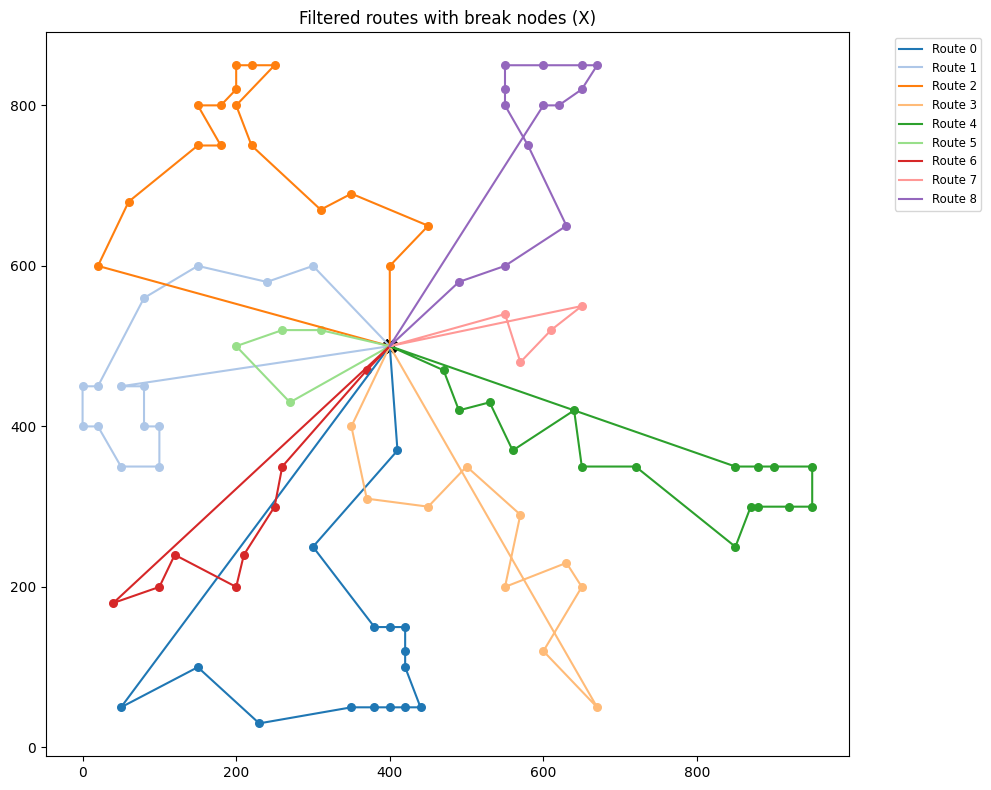

In [14]:
instance_path = "/workspaces/PyVRP-/examples/data/RC208.vrp"
sol_path = "/workspaces/PyVRP-/examples/data/RC208.sol"

new_data, res, final_routes, filtered, break_indices =run_break_experiment(instance_path, num_customers=None, break_service=30, break_tw=(11*60, 13*60), solve_time=5)

In [15]:
compute_gap(res, new_data, sol_path=sol_path, scale=0.1)

Benchmark cost: 776.1
My solution cost (scaled): 649.9000000000001
Gap vs benchmark: -16.26%


(776.1, 649.9000000000001, -16.260791135162986)

# Instance R1_10_01

Benchmark cost: 1042.0

Number of routes: 25

Reading instance...
Downsizing instance to first 100 clients...
 New total locations: 101 (depots + 100 clients)
Adjusting total available vehicles to 25 (was 250)
 Vehicle availability per type: [25]
Adding break nodes...
Break indices: [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125]
Updated fixed costs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Running solver for 30s...
Solver finished. Result cost: 76680
Running greedy repair to insert breaks...

Summary:
  Total final routes (before filtering): 25
  Break-only routes removed: 3
  Routes after filtering: 22
  All insertions feasible: True

Filtered routes (each contains exactly one break):
  Route 0: [28, 101, 101, 91, 49, 36, 55, 76]
  Route 1: [102, 102, 64, 37, 47, 87]
  Route 2: [103, 103, 29, 52, 48, 69, 2, 84]
  Route 3: [104, 104, 77, 99, 97]
  Route 4: [105, 105, 86, 58, 71, 30, 51]
  Route 5: [106, 106, 66, 18, 15

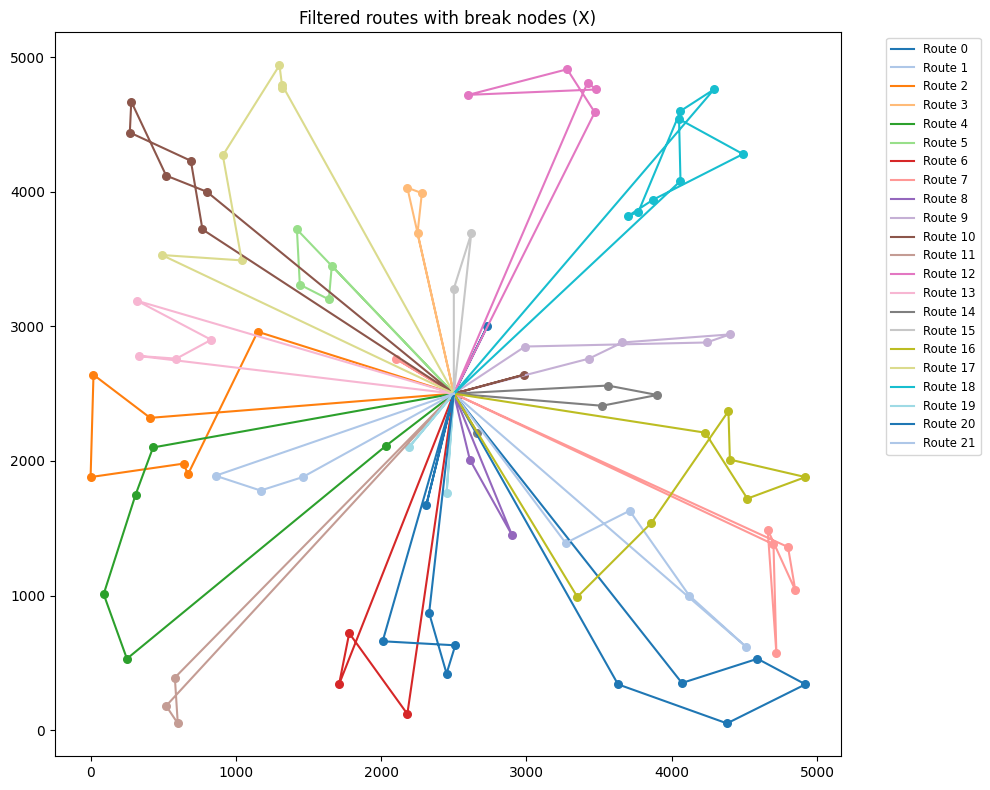

In [16]:
new_size = 100
instance_path = "/workspaces/PyVRP-/examples/data/VRPTW/R1_10_1.vrp"
sol_path = "/workspaces/PyVRP-/examples/data/VRPTW/R1_10_1.sol"
vehicles = 25
benchmark_cost = 1720.0

new_data, res, final_routes, filtered, break_indices =run_break_experiment(instance_path, num_customers=new_size, num_vehicles=vehicles, break_service=20, break_tw=(17*60, 19*60), solve_time=30)

In [17]:
compute_gap(res, new_data, sol_path=sol_path, scale=0.01, benchmark_cost=benchmark_cost)

Benchmark cost: 1720.0
My solution cost (scaled): 766.8000000000001
Gap vs benchmark: -55.42%


(1720.0, 766.8000000000001, -55.41860465116279)

# Instace C2_10_1
Benchmark cost: 581

Number of routes: 25

Reading instance...
Downsizing instance to first 100 clients...
 New total locations: 101 (depots + 100 clients)
Adjusting total available vehicles to 25 (was 250)
 Vehicle availability per type: [25]
Adding break nodes...
Break indices: [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125]
Updated fixed costs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Running solver for 30s...
Solver finished. Result cost: 51461
Running greedy repair to insert breaks...

Summary:
  Total final routes (before filtering): 25
  Break-only routes removed: 6
  Routes after filtering: 19
  All insertions feasible: True

Filtered routes (each contains exactly one break):
  Route 0: [101, 101, 17, 29, 74, 18, 21]
  Route 1: [102, 102, 64, 69, 75, 84]
  Route 2: [103, 103, 62, 76, 57, 33, 71, 24, 87, 51, 100, 25]
  Route 3: [104, 104, 88, 77, 70, 5, 72, 32, 52, 11, 13]
  Route 4: [105, 105, 19, 56, 36, 68]

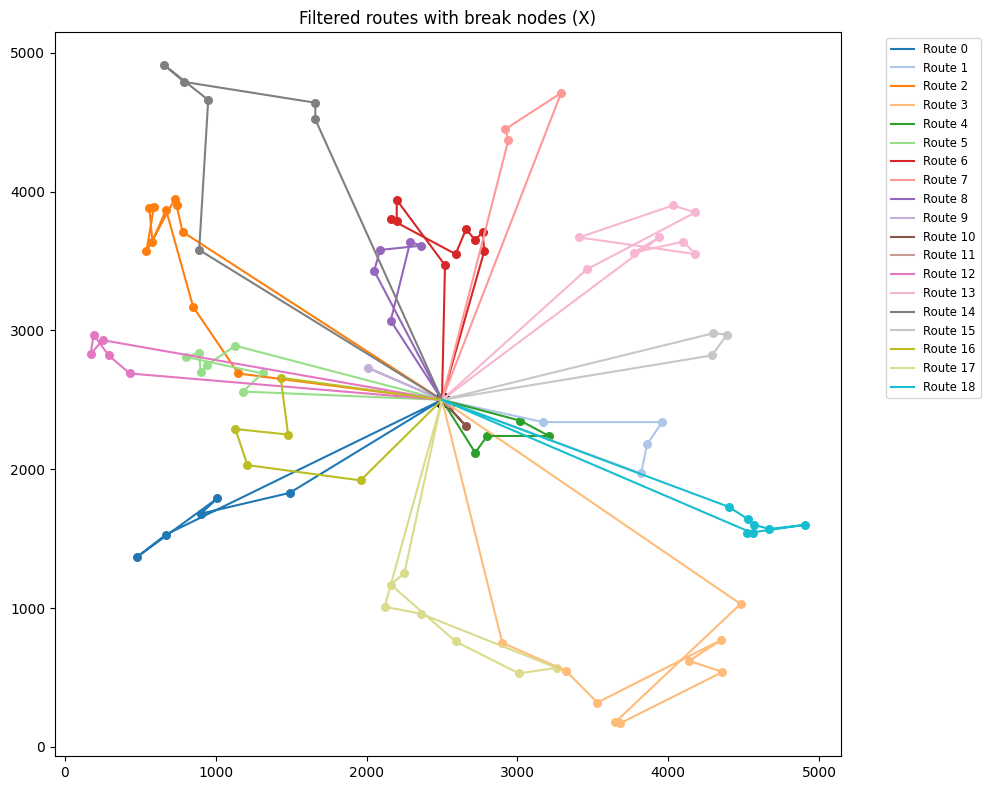

In [18]:
instance_path = "/workspaces/PyVRP-/examples/data/VRPTW/C2_10_1.vrp"
sol_path = "/workspaces/PyVRP-/examples/data/VRPTW/C2_10_1.sol"
vehicles = 25
benchmark_cost = 581.0

new_data, res, final_routes, filtered, break_indices =run_break_experiment(instance_path, num_customers=new_size, num_vehicles=vehicles, break_service=30, break_tw=(11*60, 13*60), solve_time=30)

In [19]:
compute_gap(res, new_data, sol_path=sol_path, scale=0.01, benchmark_cost=benchmark_cost)

Benchmark cost: 581.0
My solution cost (scaled): 514.61
Gap vs benchmark: -11.43%


(581.0, 514.61, -11.426850258175556)

# Instance R1_10_1
Benchmark cost: 752

Number of routes: 10

Reading instance...
Downsizing instance to first 35 clients...
 New total locations: 36 (depots + 35 clients)
Adjusting total available vehicles to 10 (was 250)
 Vehicle availability per type: [10]
Adding break nodes...
Break indices: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
Updated fixed costs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Running solver for 30s...
Solver finished. Result cost: 35720
Running greedy repair to insert breaks...

Summary:
  Total final routes (before filtering): 10
  Break-only routes removed: 0
  Routes after filtering: 10
  All insertions feasible: True

Filtered routes (each contains exactly one break):
  Route 0: [26, 36, 36, 29, 2]
  Route 1: [37, 37, 17, 4, 8, 20]
  Route 2: [14, 38, 38, 11, 12]
  Route 3: [39, 39, 9, 18, 22, 15]
  Route 4: [40, 40, 25, 34, 5, 19, 6, 7]
  Route 5: [41, 41, 33, 1]
  Route 6: [28, 42, 42, 10, 13]
  Route 7: [43, 43, 24, 32, 23, 16, 3]
  Route 8: [44, 44, 21, 35]
  Route 9: [45, 45, 31, 30, 27]

Plotting filtered routes...
Solver fin

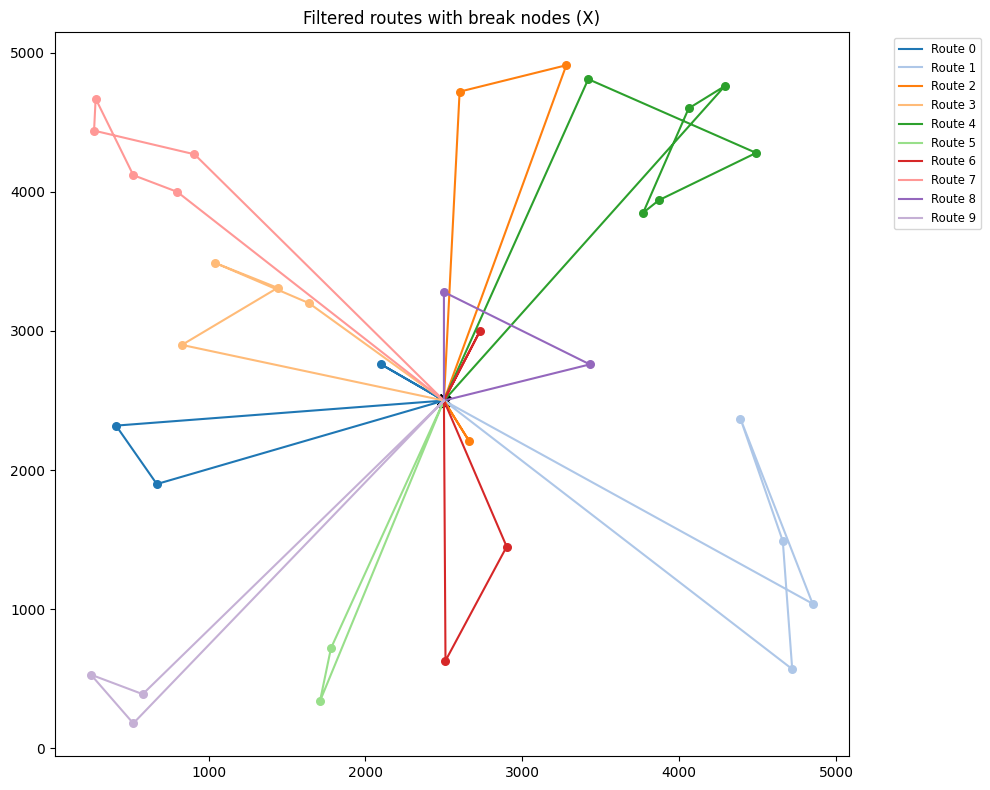

In [20]:
instance_path = "/workspaces/PyVRP-/examples/data/VRPTW/R1_10_1.vrp"
sol_path = "/workspaces/PyVRP-/examples/data/VRPTW/R1_10_1.sol"
new_size = 35
vehicles = 10
benchmark_cost = 752.0

new_data, res, final_routes, filtered, break_indices =run_break_experiment(instance_path, num_customers=new_size, num_vehicles=vehicles, break_service=30, break_tw=(11*60, 13*60), solve_time=30)

In [21]:
compute_gap(res, new_data, sol_path=sol_path, scale=0.01, benchmark_cost=benchmark_cost)

Benchmark cost: 752.0
My solution cost (scaled): 357.2
Gap vs benchmark: -52.50%


(752.0, 357.2, -52.5)

# Instance RC1_10_1
Benchmark cost: 277

Number of routes: 5

Reading instance...
Downsizing instance to first 15 clients...
 New total locations: 16 (depots + 15 clients)
Adjusting total available vehicles to 5 (was 250)
 Vehicle availability per type: [5]
Adding break nodes...
Break indices: [16, 17, 18, 19, 20]
Updated fixed costs: [0, 0, 0, 0, 0]
Running solver for 30s...
Solver finished. Result cost: 18946
Running greedy repair to insert breaks...

Summary:
  Total final routes (before filtering): 5
  Break-only routes removed: 0
  Routes after filtering: 5
  All insertions feasible: True

Filtered routes (each contains exactly one break):
  Route 0: [16, 16, 10, 2]
  Route 1: [17, 17, 11]
  Route 2: [18, 18, 6, 14, 12, 9, 8, 4, 13]
  Route 3: [19, 19, 15, 3, 1]
  Route 4: [20, 20, 5, 7]

Plotting filtered routes...
Solver finished. Result cost: 18946
Running greedy repair to insert breaks...

Summary:
  Total final routes (before filtering): 5
  Break-only routes removed: 0
  Routes after filtering: 5
  All insertions feasible: True

Filter

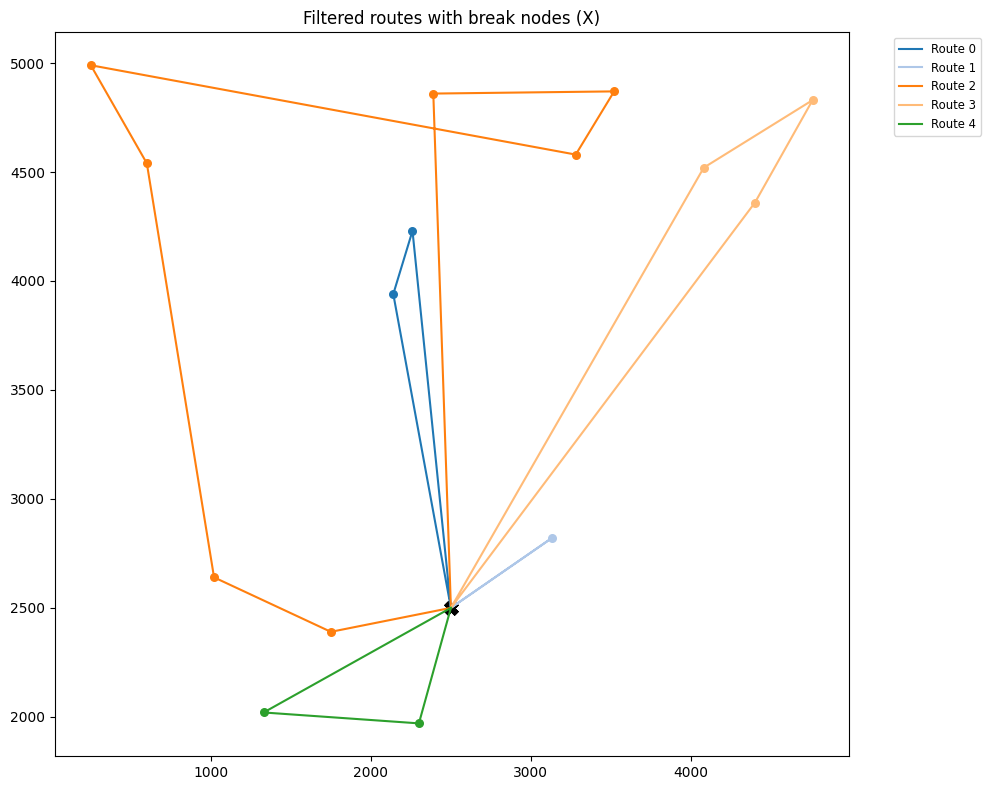

In [22]:
instance_path = "/workspaces/PyVRP-/examples/data/VRPTW/RC1_10_1.vrp"
sol_path = "/workspaces/PyVRP-/examples/data/VRPTW/RC1_10_1.sol"
new_size = 15
vehicles = 5
benchmark_cost = 277.0

new_data, res, final_routes, filtered, break_indices =run_break_experiment(instance_path, num_customers=new_size, num_vehicles=vehicles, break_service=30, break_tw=(11*60, 13*60), solve_time=30)

In [23]:
compute_gap(res, new_data, sol_path=sol_path, scale=0.01, benchmark_cost=benchmark_cost)

Benchmark cost: 277.0
My solution cost (scaled): 189.46
Gap vs benchmark: -31.60%


(277.0, 189.46, -31.6028880866426)